In [ ]:
#Code to read images and detect faces in it
#Saving fcropped faces in different directory

import os
import cv2
from time import sleep
import mediapipe as mp


mpFaceDetection = mp.solutions.face_detection
faceDetection = mpFaceDetection.FaceDetection(0.85)

dir_read = r'unprocessed_data/Barack_obama/'
dir_write = r'data/queen_elizabeth/'



for i, filename in enumerate(os.listdir(dir_read)):
    
        
    frame = cv2.imread(dir_read + str(filename))
    if(frame is not None):
        imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = faceDetection.process(imgRGB)


    if(results.detections):
        for id, detection in enumerate(results.detections):

            bboxC = detection.location_data.relative_bounding_box
            img_h, img_w, img_c = frame.shape

            xmin = int(bboxC.xmin * img_w)
            ymin = int(bboxC.ymin * img_h)
            w = int(bboxC.width * img_w)
            h = int(bboxC.height * img_h)

            new_frame = frame[ymin:ymin+h, xmin:xmin+w]
            if(new_frame.size):
                new_frame = cv2.resize(new_frame, (100, 100), interpolation = cv2.INTER_CUBIC)
                print(filename)
                cv2.imwrite(dir_write + str(i) + '.jpg', new_frame)
            

In [ ]:
#Renaming them again after manual deleting

import os

for i, filename in enumerate(os.listdir(dir_write)):
    os.rename(dir_write + filename,dir_write + 'donald' + str(i) + '.jpg')
        

for i, filename in enumerate(os.listdir(dir_write)):
    os.rename(dir_write + filename,dir_write + str(i) + '.jpg')

In [100]:
#resize data from previous model
import cv2
import os

dir_read = r'data/donald_trump/'

for i, filename in enumerate(os.listdir(dir_read)):

    frame = cv2.imread(dir_read + str(filename))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame, (100, 100), interpolation = cv2.INTER_CUBIC)
    cv2.imwrite(dir_read + str(i) + '.jpg', frame)
    

In [94]:
#Data Augmentation

import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

def random_rotation(image_array: ndarray):
    random_degree = random.uniform(-10, 10)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array,mode='s&p', amount = 0.015)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

In [101]:
import random
import os
from skimage import io
from skimage import img_as_ubyte


folder_path = r'data/donald_trump/'
augmented_path = r'augmented_data/donald_trump/'

# dictionary of the transformations functions we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}

num_files_desired = 1000

# loop on all files of the folder and build a list of files paths
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]


num_generated_files = 0

while num_generated_files <= num_files_desired:
    
    image_path = random.choice(images)
    image_to_transform = io.imread(image_path)
    
    
    num_transformations_to_apply = random.randint(1, len(available_transformations))
    num_transformations = 0
    transformed_image = None
    
    while num_transformations <= num_transformations_to_apply:
        # choose a random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        transformed_image = available_transformations[key](image_to_transform)
    
        num_transformations += 1
        

    transformed_image = img_as_ubyte(transformed_image)    
    io.imsave(augmented_path + str(num_generated_files) + '.jpg', transformed_image)
    num_generated_files += 1

In [102]:
# barack_obama: 0
# bill_gates: 1
# donald_trump: 2
# queen_elizabeth: 3

import glob
import cv2
import numpy as np

X = []
Y = []

for filename in glob.iglob('augmented_data/*/*', recursive = True):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X.append(np.asarray(img))
    if 'barack_obama' in filename:
        Y.append(0)
    elif 'bill_gates' in filename:
        Y.append(1)
    elif 'donald_trump' in filename:
        Y.append(2)
    elif 'queen_elizabeth' in filename:
        Y.append(3)
        



In [124]:
del x
x = np.asarray(X)

In [125]:
x.shape

(4004, 100, 100)

In [126]:
y = np.asarray(Y)

In [127]:
y.shape

(4004,)

3


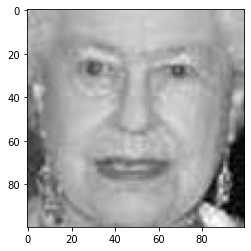

In [135]:
from matplotlib.pyplot import imshow

print(y[4001])
imshow(x[4001], cmap = 'gray')


In [137]:
import pickle
pickle.dump(x, open("data_X.pkl", "wb"))
pickle.dump(y, open("data_y.pkl", "wb"))

In [3]:
import pickle
x = pickle.load(open('data_X.pkl', 'rb'))
x.shape

(4004, 100, 100)